In [1]:
from matplotlib import pyplot as plt
import numpy as np
import importlib

In [2]:
from simulator.ideal import SimulatorIdeal
from simulator.lennard import SimulatorLennard
from simulator.magnetic import SimulatorMagnetic

In [3]:
params_model = {
    "R" : 1.0,
    "Rz" : 0.5,
    "Bz" : 1.0,
    "eccentricity": 0.01,
    "sigma":0.1,
    "epsilon":1.0
}
params_init = {
    "energy": 1.0,
    "sigma_grid":0.2,
    "position_random_shift_percentage": 0.0/100,
    "planar": False,
    "zero_momentum": True
}
params_simulation = {}

## test initialisation

In [4]:
sim = SimulatorMagnetic(**params_model)
r_init = sim.init_positions_closepack(**params_init)

In [5]:
sim.L_given_E_constraint(1)

(933.5720866956841, 516.1294539139981)

In [6]:
sim.init_velocities(1, 300);

In [7]:
sim.angular_momentum(sim.r_init, sim.v_init)[-1].sum()

299.99999999999994

In [8]:
sim.total_energy(sim.r_init, sim.v_init).sum()

1053.0

In [9]:
sim.particle_number()

1053

## Simulate

In [10]:
# history = sim.to_array(sim.simulate(1, dt=1e-5, algorithm="EULER"))
# history = sim.to_array(sim.simulate(1, dt=1e-5, algorithm="RK"))
history = sim.to_array(sim.simulate(0.0002, dt=1e-5, record_interval=1e-5, algorithm="VERLET"))

100%|██████████| 20/20 [00:02<00:00,  9.36it/s]


In [11]:
# sim_id = sim.push_db(); sim_id

In [12]:
file_path = sim.push_hdf5(); file_path

'../hdf5s/c910d6263ff2d46b.hdf5'

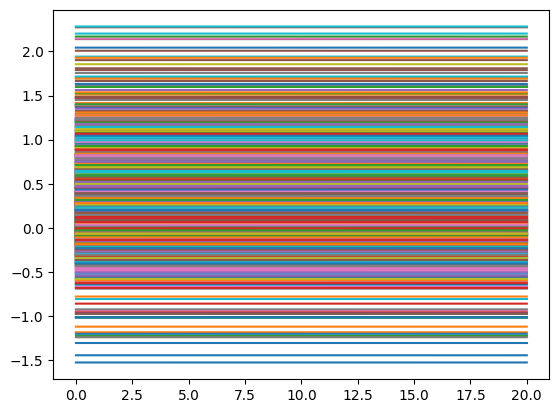

In [13]:
plt.plot(history["L"][:,2,:]);

Text(0.5, 1.0, 'Z Angular Momentum')

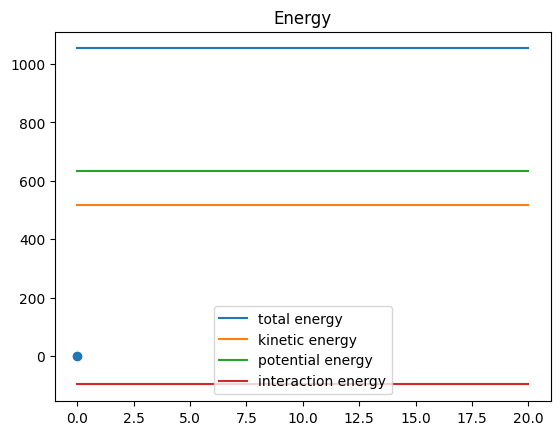

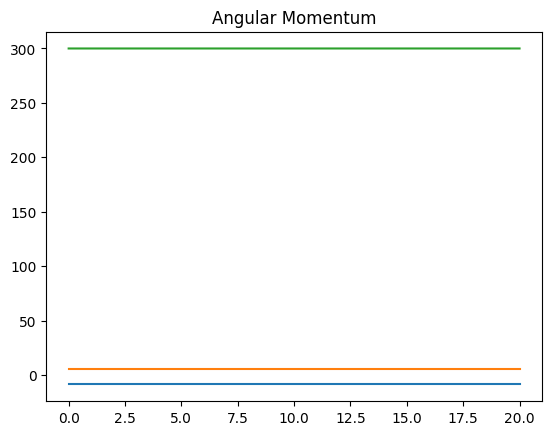

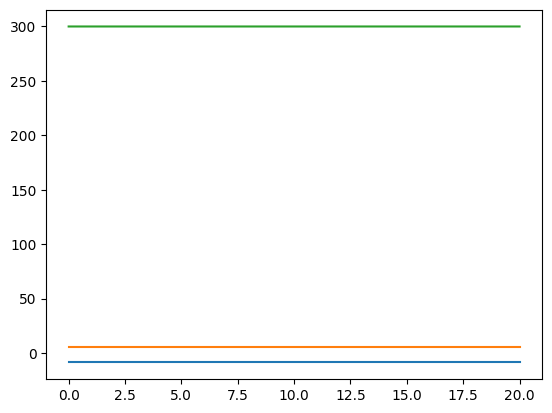

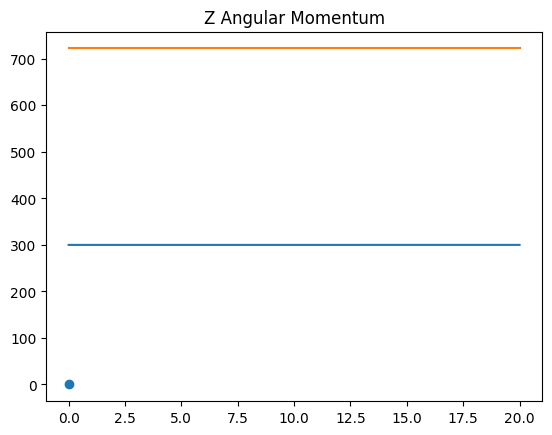

In [14]:
plt.figure()
plt.plot(np.sum(history["KE"] + history["PE"] + 0.5*history["IE"], axis=1), label="total energy")
plt.plot(np.sum(history["KE"], axis=1), label="kinetic energy")
plt.plot(np.sum(history["PE"], axis=1), label="potential energy")
plt.plot(0.5 * np.sum(history["IE"], axis=1), label="interaction energy")
plt.scatter(0,0)
plt.legend()
plt.title("Energy")

plt.figure()
plt.plot(np.sum(history["L"], axis=2))
plt.title("Angular Momentum")

plt.figure()
plt.plot(np.sum(history["L"], axis=2))

plt.figure()
plt.plot(np.sum(history["L"][:,2], axis=1))
plt.plot(np.sum(history["L"][:,2] + history["BInertia"], axis=1))
plt.scatter(0,0)
plt.title("Z Angular Momentum")


In [ ]:
fig = plt.figure()
# ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')
ax.set_aspect("auto")
pi = 20
rs = history["rs"]
ax.plot(rs[:,0,pi], rs[:,1,pi], rs[:,2,pi])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [ ]:
import datetime
import time

In [ ]:
sim = SimulatorMagnetic(**params_model)
init = sim.init_positions_velocities(**params_init)
history = sim.to_array(sim.simulate(0.03, dt=1e-4, record_interval=1e-3, algorithm="VERLET"))

sim1 = SimulatorMagnetic(**params_model)
sim1.r_init, sim1.v_init = init
history1 = sim.to_array(sim1.simulate(0.01, dt=1e-4, record_interval=1e-3, algorithm="VERLET"))
# history11 = sim.to_array(sim1.simulate(0.02, dt=1e-5, record_interval=1e-3, algorithm="VERLET"))
id = sim1.push_db()

sim2 = SimulatorMagnetic()
sim2.load(id=id)
history2 = sim2.to_array(sim2.simulate(0.02, dt=1e-4, record_interval=1e-3, algorithm="VERLET"))

np.allclose(history2["rs"], history["rs"])

In [16]:
sim = SimulatorMagnetic(**params_model)
init = sim.init_positions_velocities(**params_init)
history = sim.to_array(sim.simulate(0.03, dt=1e-3, record_interval=2e-3, algorithm="VERLET"))

sim1 = SimulatorMagnetic(**params_model)
sim1.r_init, sim1.v_init = init
history1 = sim.to_array(sim1.simulate(0.01, dt=1e-3, record_interval=2e-3, algorithm="VERLET"))
# history11 = sim.to_array(sim1.simulate(0.02, dt=1e-5, record_interval=1e-3, algorithm="VERLET"))
path = sim1.push_hdf5()

sim2 = SimulatorMagnetic()
sim2.load(hdf5_path=path)
history2 = sim2.to_array(sim2.simulate(0.02, dt=1e-3, record_interval=2e-3, algorithm="VERLET"))

np.allclose(history2["rs"], history["rs"])

100%|██████████| 100/100 [00:02<00:00, 34.24it/s]
Exception in loading item from db
Traceback (most recent call last):
  File "/home/ashmat/cluster/LJ-magnetic/source/simulator/baseIO.py", line 108, in load
    item = Client_HDF5(hdf5_path).query_simulation(self.id)
AttributeError: 'Client_HDF5' object has no attribute 'query_simulation'


AttributeError: 'Client_HDF5' object has no attribute 'query_simulation'

In [17]:
import h5py

In [29]:
f = h5py.File("../hdf5s/5078cbe2e4b4d12f.hdf5", "r")


In [31]:
list(f.attrs)

['Bz',
 'E_init',
 'L_init',
 'a',
 'b',
 'c',
 'dt',
 'eccentricity',
 'epsilon',
 'finish_time',
 'hash',
 'iterations',
 'particles',
 'record_interval',
 'sigma',
 'start_time',
 't']

In [36]:
f.attrs["hash"]

'5078cbe2e4b4d12f'

In [28]:
type(np.array(f["BInertia"])[2,5])

numpy.float32

In [20]:
f.get("BInertia")

<HDF5 dataset "BInertia": shape (6, 743), type "<f4">

In [10]:
sim = SimulatorMagnetic(**params_model)
init = sim.init_positions_velocities(**params_init)

In [11]:
print(sim.angular_momentum(sim.r_init, sim.v_init)[2].sum())
sim.rotational_push(0.5)
print(sim.angular_momentum(sim.r_init, sim.v_init)[2].sum())


-3.7666428400304364
326.7906571231679


In [12]:
from multiprocessing import Pool, cpu_count

In [13]:
pool = Pool(cpu_count())

100%|██████████| 2000/2000 [01:08<00:00, 29.33it/s]


In [14]:
params_simulation = {
    "iteration_time" : 1,
    "dt" : 0.0005, 
    "record_interval" : 0.01, 
    "algorithm" : "EULER"
}

In [15]:
results = []
for i in range(3):
    sim = SimulatorMagnetic(name = "A", **params_model)
    init = sim.init_positions_velocities(**params_init)
    
    sim1 = SimulatorMagnetic(name = "A", **params_model)
    sim1.r_init, sim1.v_init = init

    results.append(pool.apply_async(sim.simulate_async, kwds=params_simulation))
    results.append(pool.apply_async(sim1.simulate_async, kwds=params_simulation))


In [16]:
np.array(sorted([x.get() for x in results])).shape

(6,)